# Cotton Disease Using InceptionV3

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\nehak\anaconda3\lib\site-packages\tensorflow\python\client\session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [80]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [81]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_data_path = r"c:\Users\nehak\Project 13- Cotton Disease Classification Using CNN\Cotton Disease\train"
test_data_path = r"c:\Users\nehak\Project 13- Cotton Disease Classification Using CNN\Cotton Disease\test"

In [82]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [83]:
# Make sure you provide the same target size as initialied for the image size
training_data = training_datagen.flow_from_directory(train_data_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [84]:
test_data = test_datagen.flow_from_directory(test_data_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [85]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [86]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [90]:
 # useful for getting number of output classes
folders = glob(r"c:\Users\nehak\Project 13- Cotton Disease Classification Using CNN\Cotton Disease\train\*")

In [91]:
folders

['c:\\Users\\nehak\\Project 13- Cotton Disease Classification Using CNN\\Cotton Disease\\train\\diseased cotton leaf',
 'c:\\Users\\nehak\\Project 13- Cotton Disease Classification Using CNN\\Cotton Disease\\train\\diseased cotton plant',
 'c:\\Users\\nehak\\Project 13- Cotton Disease Classification Using CNN\\Cotton Disease\\train\\fresh cotton leaf',
 'c:\\Users\\nehak\\Project 13- Cotton Disease Classification Using CNN\\Cotton Disease\\train\\fresh cotton plant']

In [92]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [93]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [94]:
# view the structure of the model
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_470 (Conv2D)            (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_470 (Batch  (None, 111, 111, 32  96         ['conv2d_470[0][0]']             
 Normalization)                 )                                                           

 conv2d_481 (Conv2D)            (None, 25, 25, 32)   6144        ['average_pooling2d_45[0][0]']   
                                                                                                  
 batch_normalization_475 (Batch  (None, 25, 25, 64)  192         ['conv2d_475[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_477 (Batch  (None, 25, 25, 64)  192         ['conv2d_477[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_480 (Batch  (None, 25, 25, 96)  288         ['conv2d_480[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_492 (Conv2D)            (None, 25, 25, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_492 (Batch  (None, 25, 25, 64)  192         ['conv2d_492[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_492 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_492[0][0]']
                                                                                                  
 conv2d_490 (Conv2D)            (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_49

                                                                                                  
 activation_499 (Activation)    (None, 12, 12, 96)   0           ['batch_normalization_499[0][0]']
                                                                                                  
 max_pooling2d_22 (MaxPooling2D  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_496[0][0]',         
                                                                  'activation_499[0][0]',         
                                                                  'max_pooling2d_22[0][0]']       
                                                                                                  
 conv2d_50

 mixed4 (Concatenate)           (None, 12, 12, 768)  0           ['activation_500[0][0]',         
                                                                  'activation_503[0][0]',         
                                                                  'activation_508[0][0]',         
                                                                  'activation_509[0][0]']         
                                                                                                  
 conv2d_514 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_514 (Batch  (None, 12, 12, 160)  480        ['conv2d_514[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_524 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_524 (Batch  (None, 12, 12, 160)  480        ['conv2d_524[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_524 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_524[0][0]']
                                                                                                  
 conv2d_525 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_524[0][0]']         
                                                                                                  
 batch_normalization_525 (Batch  (None, 12, 12, 160)  480        ['conv2d_525[0][0]']             
 Normaliza

 activation_534 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_534[0][0]']
                                                                                                  
 conv2d_535 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_534[0][0]']         
                                                                                                  
 batch_normalization_535 (Batch  (None, 12, 12, 192)  576        ['conv2d_535[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_535 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_535[0][0]']
                                                                                                  
 conv2d_531 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_543 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_543[0][0]']
                                                                                                  
 conv2d_540 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_544 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_543[0][0]']         
                                                                                                  
 batch_normalization_540 (Batch  (None, 12, 12, 192)  576        ['conv2d_540[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_554 (Conv2D)            (None, 5, 5, 192)    245760      ['average_pooling2d_52[0][0]']   
                                                                                                  
 batch_normalization_546 (Batch  (None, 5, 5, 320)   960         ['conv2d_546[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_548 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_548[0][0]']
                                                                                                  
 activation_549 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_549[0][0]']
          

                                                                                                  
 activation_557 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_557[0][0]']
                                                                                                  
 activation_558 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_558[0][0]']
                                                                                                  
 activation_561 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_561[0][0]']
                                                                                                  
 activation_562 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_562[0][0]']
                                                                                                  
 batch_normalization_563 (Batch  (None, 5, 5, 192)   576         ['conv2d_563[0][0]']             
 Normaliza

In [95]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [96]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(training_data,
                        validation_data=test_data,
                        epochs=20,
                        steps_per_epoch=len(training_data),
                        validation_steps=len(test_data)
)

C:\Users\nehak\AppData\Local\Temp\ipykernel_19440\2552033104.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(training_data,


Epoch 1/20
61/61 [==============================] - 141s 2s/step - loss: 3.0786 - accuracy: 0.7119 - val_loss: 0.3774 - val_accuracy: 0.8679
Epoch 2/20
61/61 [==============================] - 132s 2s/step - loss: 0.6122 - accuracy: 0.8934 - val_loss: 0.1724 - val_accuracy: 0.9528
Epoch 3/20
61/61 [==============================] - 149s 2s/step - loss: 0.5171 - accuracy: 0.9067 - val_loss: 0.9479 - val_accuracy: 0.8302
Epoch 4/20
61/61 [==============================] - 151s 2s/step - loss: 0.5461 - accuracy: 0.9047 - val_loss: 0.5074 - val_accuracy: 0.9340
Epoch 5/20
61/61 [==============================] - 134s 2s/step - loss: 0.3954 - accuracy: 0.9272 - val_loss: 0.2754 - val_accuracy: 0.9434
Epoch 6/20
61/61 [==============================] - 131s 2s/step - loss: 0.4213 - accuracy: 0.9277 - val_loss: 0.7877 - val_accuracy: 0.9151
Epoch 7/20
61/61 [==============================] - 133s 2s/step - loss: 0.6200 - accuracy: 0.9159 - val_loss: 0.4290 - val_accuracy: 0.9151
Epoch 8/20
61

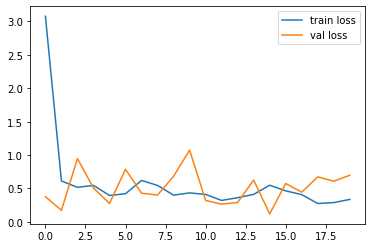

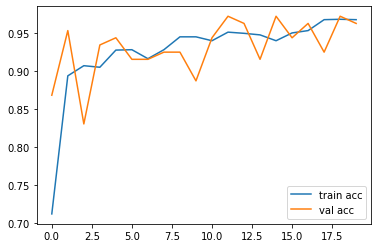

<Figure size 432x288 with 0 Axes>

In [97]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [98]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [99]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [101]:
#prediction of test data
y_pred = model.predict(test_data)
y_pred

array([[4.41488709e-36, 1.05159193e-21, 9.93917947e-14, 1.00000000e+00],
       [3.35662934e-23, 0.00000000e+00, 1.00000000e+00, 4.14383605e-25],
       [3.66298169e-25, 4.77435353e-31, 1.00000000e+00, 2.00887867e-26],
       [1.55262227e-11, 6.36779095e-13, 1.00000000e+00, 3.63339349e-26],
       [1.03423882e-13, 3.11410274e-14, 1.00000000e+00, 6.74678277e-14],
       [4.89084861e-08, 1.08358524e-10, 8.07541426e-17, 1.00000000e+00],
       [8.68154137e-27, 7.39219341e-13, 2.29774622e-29, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 4.45265255e-37, 1.78265412e-35],
       [1.59909677e-18, 6.96331385e-36, 1.00000000e+00, 8.18081175e-30],
       [6.78184194e-24, 6.71549757e-17, 3.60987580e-13, 1.00000000e+00],
       [3.69323317e-07, 1.64622523e-23, 9.99999642e-01, 1.25368415e-20],
       [1.58028264e-22, 1.00000000e+00, 1.57196944e-27, 1.90475627e-26],
       [5.56861597e-25, 5.22503861e-21, 4.63649361e-15, 1.00000000e+00],
       [1.57401134e-10, 9.27939095e-20, 1.00000000e

In [102]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [103]:
y_pred

array([3, 2, 2, 2, 2, 3, 3, 1, 2, 3, 2, 1, 3, 2, 2, 1, 0, 2, 0, 1, 3, 0,
       1, 3, 0, 2, 2, 0, 0, 2, 0, 1, 2, 3, 0, 2, 1, 1, 0, 1, 1, 1, 3, 1,
       1, 2, 1, 3, 3, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 3, 3,
       3, 3, 2, 0, 3, 3, 2, 0, 2, 3, 3, 0, 0, 1, 1, 3, 3, 1, 3, 1, 0, 0,
       1, 0, 2, 2, 2, 3, 2, 2, 1, 0, 0, 0, 1, 3, 1, 1, 1, 1], dtype=int64)

In [104]:
from tensorflow.keras.models import load_model

In [105]:
from tensorflow.keras.preprocessing import image

In [106]:
model=load_model('model_inception.h5')

In [107]:
img=image.load_img(r"c:\Users\nehak\Project 13- Cotton Disease Classification Using CNN\Cotton Disease\test\fresh cotton leaf\d (8)_iaip.jpg",target_size=(224,224))

In [108]:
x=image.img_to_array(img)
x

array([[[ 99.,  82.,  72.],
        [107.,  90.,  80.],
        [105.,  88.,  78.],
        ...,
        [178., 174., 171.],
        [179., 175., 172.],
        [191., 187., 184.]],

       [[101.,  84.,  74.],
        [113.,  96.,  86.],
        [124., 107.,  97.],
        ...,
        [145., 141., 138.],
        [188., 184., 181.],
        [186., 182., 179.]],

       [[120., 103.,  93.],
        [103.,  86.,  76.],
        [128., 111., 101.],
        ...,
        [162., 158., 155.],
        [175., 171., 168.],
        [183., 179., 176.]],

       ...,

       [[175., 210., 126.],
        [175., 210., 126.],
        [175., 210., 126.],
        ...,
        [ 50.,  43.,  33.],
        [ 59.,  52.,  42.],
        [165., 135.,  97.]],

       [[173., 208., 124.],
        [173., 208., 124.],
        [173., 208., 124.],
        ...,
        [ 80.,  73.,  63.],
        [ 71.,  64.,  54.],
        [183., 149., 111.]],

       [[169., 203., 126.],
        [171., 206., 126.],
        [173., 2

In [109]:
x.shape

(224, 224, 3)

In [110]:
x=x/255

In [111]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [112]:
model.predict(img_data)

array([[9.999709e-01, 6.824335e-07, 2.649098e-05, 1.951640e-06]],
      dtype=float32)

In [113]:
img_data

array([[[[-0.99695504, -0.9974779 , -0.99778545],
         [-0.9967089 , -0.99723184, -0.9975394 ],
         [-0.9967705 , -0.99729335, -0.9976009 ],
         ...,
         [-0.9945252 , -0.9946482 , -0.9947405 ],
         [-0.99449444, -0.99461746, -0.99470973],
         [-0.99412537, -0.9942484 , -0.99434066]],

        [[-0.9968935 , -0.9974164 , -0.99772394],
         [-0.9965244 , -0.9970473 , -0.99735487],
         [-0.9961861 , -0.9967089 , -0.99701655],
         ...,
         [-0.9955402 , -0.9956632 , -0.9957555 ],
         [-0.99421763, -0.99434066, -0.9944329 ],
         [-0.99427915, -0.99440217, -0.99449444]],

        [[-0.9963091 , -0.996832  , -0.9971396 ],
         [-0.996832  , -0.99735487, -0.9976624 ],
         [-0.99606305, -0.9965859 , -0.9968935 ],
         ...,
         [-0.9950173 , -0.9951403 , -0.9952326 ],
         [-0.99461746, -0.9947405 , -0.99483275],
         [-0.9943714 , -0.99449444, -0.9945867 ]],

        ...,

        [[-0.99461746, -0.99354094, -0

In [114]:
a=np.argmax(model.predict(img_data), axis=1)

In [115]:
a==1

array([False])

In [116]:
# Validating the Test Set
validation_path = (r"c:\Users\nehak\Project 13- Cotton Disease Classification Using CNN\Cotton Disease\val")

In [130]:
valid_data = test_datagen.flow_from_directory(validation_path, target_size=(224, 224), 
                                      batch_size=32,
                                      class_mode='categorical')

Found 253 images belonging to 4 classes.


In [131]:
predicted = model.predict(valid_data[0][0])

In [132]:
actual=[]
for i in valid_data[0][1]:
  actual.append(np.argmax(i))

predict=[]
for i in predicted:
  predict.append(np.argmax(i))

In [133]:
from sklearn.metrics import accuracy_score
print( "InceptionV3 Model's Accuracy-", accuracy_score(actual, predict))

InceptionV3 Model's Accuracy- 0.9375
